<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

**Ник на kaggle:**
Роман_Крайнов

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:

df = pd.read_csv('./train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
df.loc[np.random.randint(5282, size=5)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4342,25,19.90,505.45,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,0
2346,13,100.35,1358.85,Female,0,No,No,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4071,6,49.25,255.6,Female,0,No,No,No,No phone service,DSL,No,No,No,Yes,Yes,Yes,One year,Yes,Mailed check,0
443,1,83.40,83.4,Female,0,No,No,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,0
1459,3,80.50,232.35,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,0


In [ ]:
df.isna().apply(lambda string: string.apply(lambda col: int(col))).sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
df['TotalSpent'] = df['TotalSpent'].str.replace(r"[^\d\.]", "")
df.apply(lambda string: string.apply(lambda col: col == '')).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Как мы видим, в нашем датасете нет NaN значений, однако есть пустые строки в колонке TotalSpent. Заполним их средним по столбцу.

In [ ]:
df.iloc[df[df["TotalSpent"] == ""].index, 2] = (np.mean(df[df["TotalSpent"] != ""]["TotalSpent"].astype("float64"))).astype("object")
df["TotalSpent"] = df["TotalSpent"].astype("float64")

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

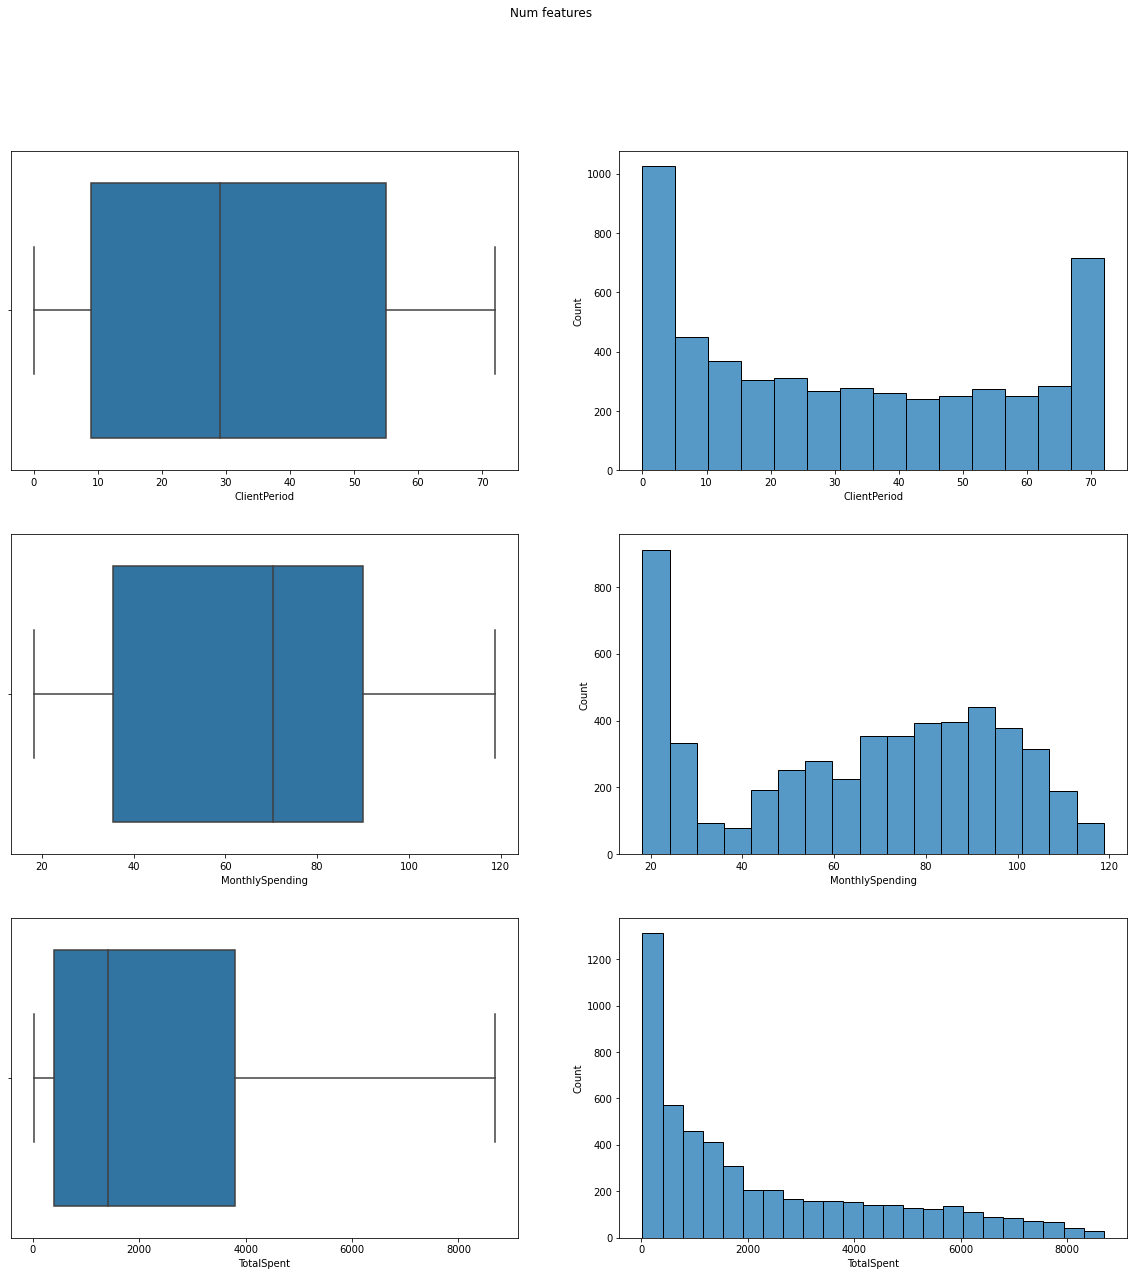

In [ ]:
fig, axes = plt.subplots(len(num_cols), 2, figsize=(20,20))
fig.suptitle('Num features')
for i in range(len(num_cols)):
  sns.boxplot(ax=axes[i, 0], x=df[num_cols[i]])
  sns.histplot(ax=axes[i, 1], x=df[num_cols[i]])


In [ ]:
for col in cat_cols:
  print()
  print(f"Столбец {col}:")
  print(df[col].value_counts())


Столбец Sex:
Male      2655
Female    2627
Name: Sex, dtype: int64

Столбец IsSeniorCitizen:
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64

Столбец HasPartner:
No     2705
Yes    2577
Name: HasPartner, dtype: int64

Столбец HasChild:
No     3676
Yes    1606
Name: HasChild, dtype: int64

Столбец HasPhoneService:
Yes    4761
No      521
Name: HasPhoneService, dtype: int64

Столбец HasMultiplePhoneNumbers:
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

Столбец HasInternetService:
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

Столбец HasOnlineSecurityService:
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

Столбец HasOnlineBackup:
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64

Столбец HasDeviceProtect

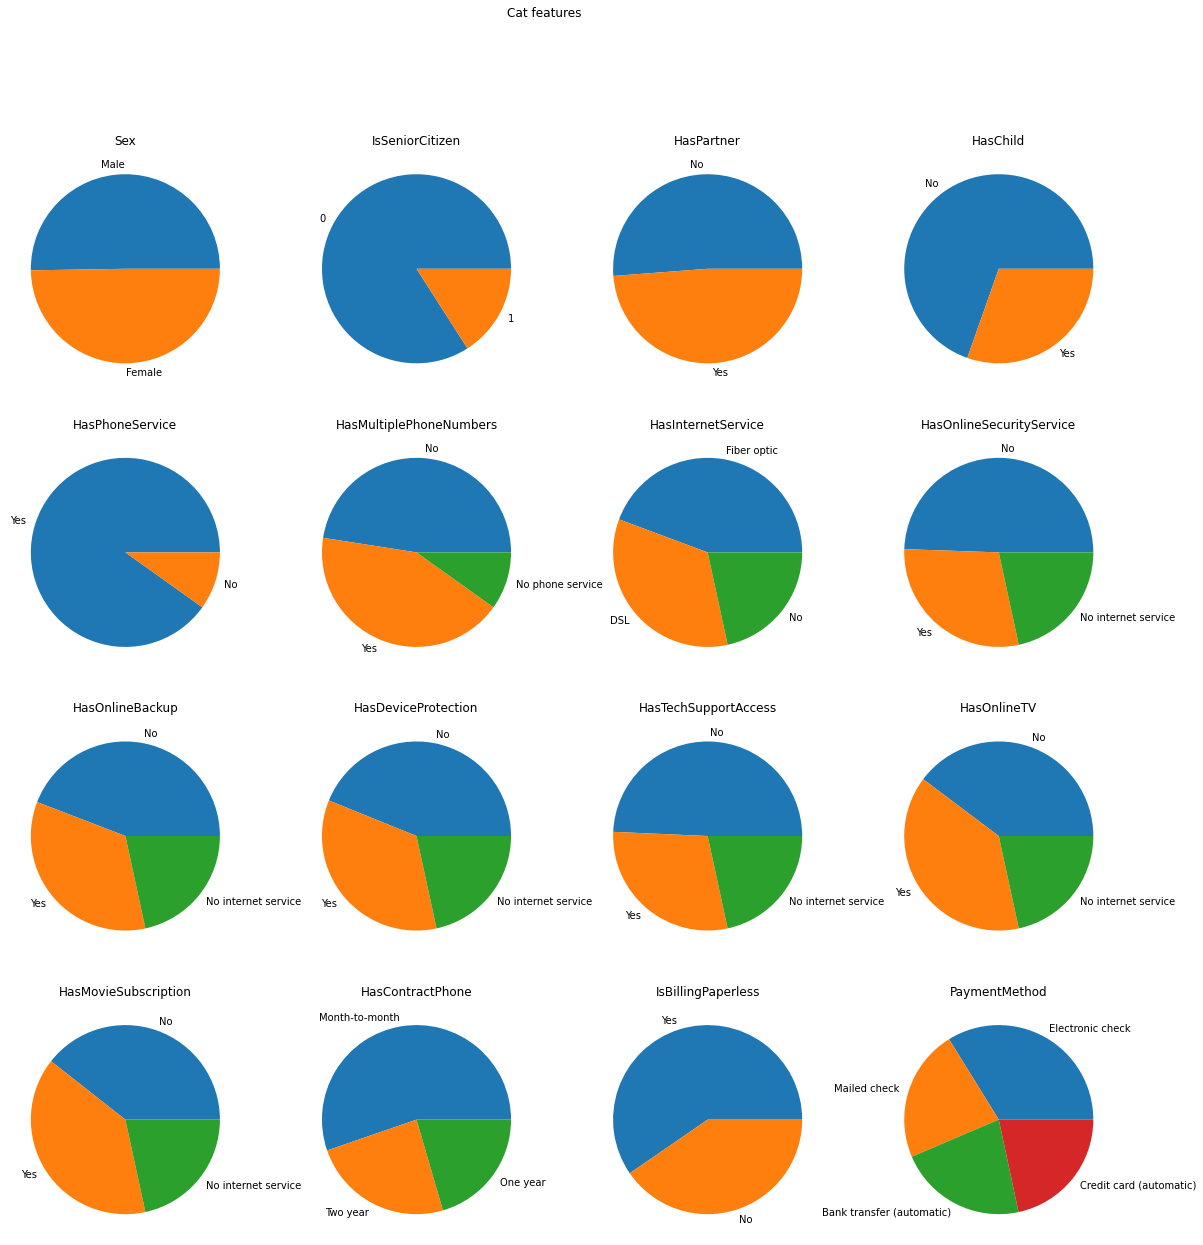

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20,20))
fig.suptitle('Cat features')
for i in range(4):
  axes[i, 0].pie(x=df[cat_cols[4*i]].value_counts().values, labels=df[cat_cols[4*i]].value_counts().index)
  axes[i, 0].title.set_text(cat_cols[4*i])
  axes[i, 1].pie(x=df[cat_cols[4*i + 1]].value_counts().values, labels=df[cat_cols[4*i + 1]].value_counts().index)
  axes[i, 1].title.set_text(cat_cols[4*i + 1])
  axes[i, 2].pie(x=df[cat_cols[4*i + 2]].value_counts().values, labels=df[cat_cols[4*i + 2]].value_counts().index)
  axes[i, 2].title.set_text(cat_cols[4*i + 2])
  axes[i, 3].pie(x=df[cat_cols[4*i + 3]].value_counts().values, labels=df[cat_cols[4*i + 3]].value_counts().index)
  axes[i, 3].title.set_text(cat_cols[4*i + 3])


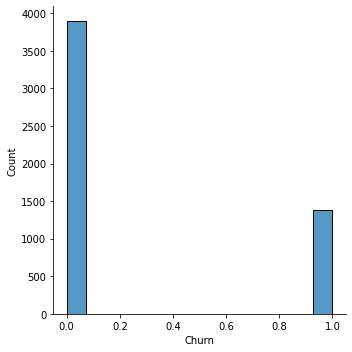

In [ ]:
sns.displot(x='Churn', data=df);

Проанализировав график выше, можно утверждать, что дисбаланса классов нет.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, f1_score

One-hot кодировка категориальных признаков:

In [ ]:
df_origin = df
df = pd.concat([df_origin[num_cols], pd.get_dummies(df_origin[cat_cols])], axis=1)

In [ ]:
y = df_origin['Churn']

Обучение модели:

In [ ]:
scaler = StandardScaler()
clf_log = LogisticRegression()
pipe = make_pipeline(
    scaler,
    clf_log)
param_grid = {
    "logisticregression__C": [100, 10, 1, 0.1, 0.01, 0.001], 
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'logisticregression__solver'  : ['newton-cg', 'lbfgs', 'liblinear']}
model_log = GridSearchCV(pipe, param_grid, n_jobs=-1, verbose=False,  scoring='roc_auc', cv=5)

In [ ]:
model_log.fit(df, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  F

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.01,
                                                   0.001],
                         'logisticregression__penalty': ['l1', 'l2',
                                                         'elasticnet', 'none'],
                         'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                        'liblinear']},
             scoring='roc_auc', verbose=False)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [ ]:
print(f'Лучшее качество - {model_log.score(df, y)}')
print('Лучшие параметры:')

model_log.best_params_

Лучшее качество - 0.8488802802385692
Лучшие параметры:


{'logisticregression__C': 10,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
df_origin_x = df_origin[num_cols + cat_cols]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_origin_x, y, test_size=0.3, random_state=42)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [ ]:
import catboost

In [ ]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, cat_features=cat_cols)


In [ ]:
                                             

boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

In [ ]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

print(f'ROC_AUC на Train: {train_auc}')
print(f'ROC_AUC на Test: {test_auc}')

ROC_AUC на Train: 0.8982890481110463
ROC_AUC на Test: 0.8313099358852443


# **Кривые валидации**

In [ ]:
n_estimators = np.arange(1,400,20)

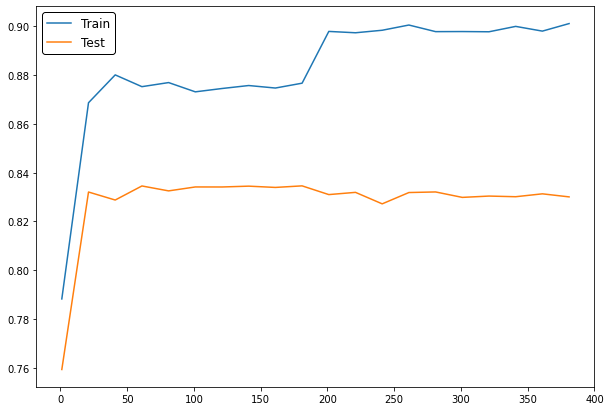

In [ ]:
train_roc_auc = np.array([])
test_roc_auc = np.array([])
for i in n_estimators:
  boosting_model = catboost.CatBoostClassifier(n_estimators=i, cat_features=cat_cols)
  boosting_model.fit(X_train, y_train, verbose=False)
  y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
  y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]
  train_roc_auc = np.append(train_roc_auc, roc_auc_score(y_train, y_train_predicted))
  test_roc_auc = np.append(test_roc_auc, roc_auc_score(y_test, y_test_predicted))
plt.figure(figsize=(10,7))
plt.plot(n_estimators, train_roc_auc, label='Train')
plt.plot(n_estimators, test_roc_auc, label='Test')
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")

plt.show()

In [ ]:
learning_rate = np.arange(0.001,0.1,0.01)

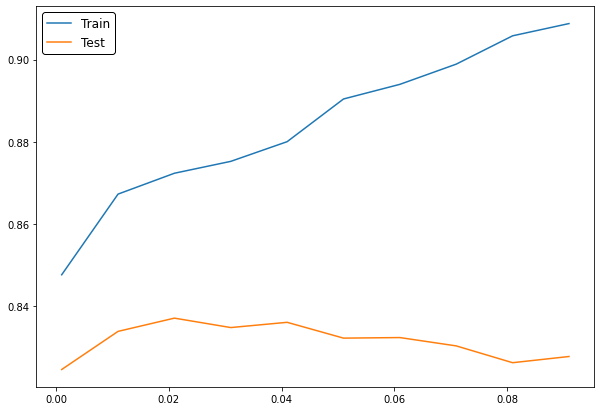

In [ ]:
train_roc_auc = np.array([])
test_roc_auc = np.array([])
for i in learning_rate:
  boosting_model = catboost.CatBoostClassifier(n_estimators=250, cat_features=cat_cols, learning_rate=i)
  boosting_model.fit(X_train, y_train, verbose=False)
  y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
  y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]
  train_roc_auc = np.append(train_roc_auc, roc_auc_score(y_train, y_train_predicted))
  test_roc_auc = np.append(test_roc_auc, roc_auc_score(y_test, y_test_predicted))
plt.figure(figsize=(10,7))
plt.plot(learning_rate, train_roc_auc, label='Train')
plt.plot(learning_rate, test_roc_auc, label='Test')
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")

plt.show()

# Подбор гиперпараметров с помощью кросс-валидации

In [ ]:
params_grig = {
    "n_estimators": np.linspace(150, 250, 3),
    "depth": [10, 6],
    "learning_rate": np.arange(0.001,0.1,0.025)
}

In [ ]:
clf = GridSearchCV(boosting_model, params_grig, n_jobs=-1, verbose=True,  scoring='roc_auc', cv=5)

In [ ]:
clf.fit(df_origin_x, y)

In [ ]:
best_params = clf.best_params_

In [ ]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.849539531797453

# Реализация стэккинга

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df_dummies = pd.concat([df_origin_x[num_cols], pd.get_dummies(df_origin_x[cat_cols])], axis=1)

In [ ]:
df_stack = df_origin_x
df_stack["logreg"] = model_log.predict_proba(df_dummies)[:,1]

In [ ]:
scaler = StandardScaler()
clf_knn = KNeighborsClassifier()
pipe = make_pipeline(
    scaler,
    clf_knn)
param_grid = {
    "kneighborsclassifier__leaf_size": list(range(1,15)), 
    'kneighborsclassifier__n_neighbors': [18, 19],
    'kneighborsclassifier__p'  : [1, 2]}
model_knn = GridSearchCV(pipe, param_grid, n_jobs=-1, verbose=False,  scoring='roc_auc', cv=5)

In [ ]:
model_knn.fit(df_dummies, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__leaf_size': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14],
                         'kneighborsclassifier__n_neighbors': [18, 19],
                         'kneighborsclassifier__p': [1, 2]},
             scoring='roc_auc', verbose=False)

In [ ]:
df_stack["KNN"] = model_knn.predict_proba(df_dummies)[:,1]

In [ ]:
params_grid = {
    "n_estimators": np.linspace(100, 150, 2),
    "depth": [3, 6],
    "learning_rate": np.arange(0.0001, 0.001, 0.0005)
}
boosting_model = catboost.CatBoostClassifier(n_estimators=200, cat_features=cat_cols)

clf_stack = GridSearchCV(boosting_model, params_grid, n_jobs=-1, verbose=True,  scoring='roc_auc', cv=5)

In [ ]:
clf_stack.fit(df_origin_x, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0:	learn: 0.6927035	total: 58.6ms	remaining: 8.74s
1:	learn: 0.6922887	total: 68.8ms	remaining: 5.09s
2:	learn: 0.6918690	total: 78.2ms	remaining: 3.83s
3:	learn: 0.6914046	total: 88.1ms	remaining: 3.21s
4:	learn: 0.6908956	total: 96.6ms	remaining: 2.8s
5:	learn: 0.6904503	total: 105ms	remaining: 2.52s
6:	learn: 0.6900576	total: 113ms	remaining: 2.31s
7:	learn: 0.6895658	total: 122ms	remaining: 2.17s
8:	learn: 0.6891172	total: 131ms	remaining: 2.05s
9:	learn: 0.6886089	total: 140ms	remaining: 1.96s
10:	learn: 0.6880975	total: 148ms	remaining: 1.87s
11:	learn: 0.6876784	total: 157ms	remaining: 1.8s
12:	learn: 0.6872895	total: 165ms	remaining: 1.74s
13:	learn: 0.6868196	total: 174ms	remaining: 1.69s
14:	learn: 0.6864063	total: 182ms	remaining: 1.64s
15:	learn: 0.6860213	total: 191ms	remaining: 1.6s
16:	learn: 0.6855832	total: 199ms	remaining: 1.56s
17:	learn: 0.6851633	total: 208ms	remaining: 1.52s
18:	learn: 0.6847643	total: 21

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f14820ed350>,
             n_jobs=-1,
             param_grid={'depth': [3, 6],
                         'learning_rate': array([0.0001, 0.0006]),
                         'n_estimators': array([100., 150.])},
             scoring='roc_auc', verbose=True)

In [ ]:
df_stack['catboost'] = clf_stack.predict_proba(df_origin_x)[:,1]

In [ ]:
df_stack_pred = df_stack[['logreg', 'KNN', 'catboost']]

Получаем коэффициенты для предсказаных вероятностей

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
scaler = StandardScaler()
clf_reg = LinearRegression()
model_reg = make_pipeline(
    scaler,
    clf_reg)

model_reg.fit(df_stack_pred, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
coef = model_reg[1].coef_

In [ ]:
df_stack['logreg'] *= coef[0]
df_stack['KNN'] *= coef[1]
df_stack['catboost'] *= coef[2]

In [ ]:
df_stack_pred = df_stack[['logreg', 'KNN', 'catboost']]

Создаем модель град.бустинга и предобработку данных для нее

In [ ]:
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
xgb_cl = xgb.XGBClassifier()


In [ ]:
categorical_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("oh-encode", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)
numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")), 
           ("scale", StandardScaler())]
)
full_processor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols),
        ("categorical", categorical_pipeline, cat_cols),
    ]
)

In [ ]:
X_processed = full_processor.fit_transform(df_origin_x)
y_processed = SimpleImputer(strategy="most_frequent").fit_transform(
    y.values.reshape(-1, 1)
)


In [ ]:
params = {
    'max_depth':list(range(1, 4,1)),
    'n_estimators': np.arange(60,90,10),
    'eta':np.arange(0.01,0.05,0.01),
}
xgb_cl = xgb.XGBClassifier()
model_xgb = GridSearchCV(xgb_cl, params, n_jobs=-1, verbose=True,  scoring='roc_auc', cv=5)

In [ ]:
X_processed_train, X_processed_test, y_processed_train, y_processed_test = train_test_split(X_processed, y_processed, test_size=0.3, random_state=42)

In [ ]:
model_xgb.fit(X_processed_train, y_processed_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'eta': array([0.01, 0.02, 0.03, 0.04]),
                         'max_depth': [1, 2, 3],
                         'n_estimators': array([60, 70, 80])},
             scoring='roc_auc', verbose=True)

In [ ]:
model_xgb.best_params_

{'eta': 0.01, 'max_depth': 3, 'n_estimators': 60}

In [ ]:

preds = model_xgb.predict_proba(X_processed_test)[:,1]

roc_auc_score(y_processed_test, preds)

0.8349594475226854

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

**Ник на kaggle:**
Роман_Крайнов

In [ ]:
best_model = model_xgb

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

Заполним пропуски в столбце TotalSpent

In [ ]:
X_test['TotalSpent'] = X_test['TotalSpent'].str.replace(r"[^\d\.]", "")
X_test.apply(lambda string: string.apply(lambda col: col == '')).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


ClientPeriod                0
MonthlySpending             0
TotalSpent                  2
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [ ]:

X_test.iloc[X_test[X_test["TotalSpent"] == ""].index, 2] = (np.mean(X_test[X_test["TotalSpent"] != ""]["TotalSpent"].astype("float64"))).astype("object")
X_test["TotalSpent"] = X_test["TotalSpent"].astype("float64")

Создадим новые признаки - предсказания различных моделей

In [ ]:
X_test_origin = X_test
X_test_stack = X_test_origin
X_test = pd.concat([X_test_origin[num_cols], pd.get_dummies(X_test_origin[cat_cols])], axis=1)

In [ ]:
X_test_stack["logreg"] = model_log.predict_proba(X_test)[:,1]

In [ ]:
X_test_stack["KNN"] = model_knn.predict_proba(X_test)[:,1]

In [ ]:
X_test_stack["catboost"] = clf_stack.predict_proba(X_test_origin)[:,1]

In [ ]:
X_test_pred = X_test_stack[['logreg', 'KNN', 'catboost']]

Домножим их на коэффициенты

In [ ]:
model_reg[1].coef_

array([-0.01311389,  0.08676551,  0.18308596])

In [ ]:
X_test_stack['logreg'] *= coef[0]
X_test_stack['KNN'] *= coef[1]
X_test_stack['catboost'] *= coef[2]

In [ ]:
X_processed = full_processor.transform(X_test_stack)

In [ ]:
submission['Churn'] = best_model.predict_proba(X_processed)[:,1]


In [ ]:
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.